In [5]:
"""
Landon Buell
30 December 2019
"""

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.fftpack as fftpack
import scipy.io.wavfile as sciowav

int_dir = 'C:/Users/Landon/Documents/GitHub/Buell-Senior-Thesis/Notebooks'
wav_dir = 'C:/Users/Landon/Documents/wav_audio/Flutes/AltoFlute.vib.ff.stereo'
filename = 'AltoFlute.vib.ff.A4.stereo.wav'
rate = 44100

In [20]:
        #### LOAD .WAV FILE ####

os.chdir(wav_dir)
rate,data = sciowav.read(filename)

data = np.transpose(data)               # transpose
L = data[0]/np.max(np.abs(data[0]))     # norm. L waveform
R = data[1]/np.max(np.abs(data[1]))     # norm. R waveform


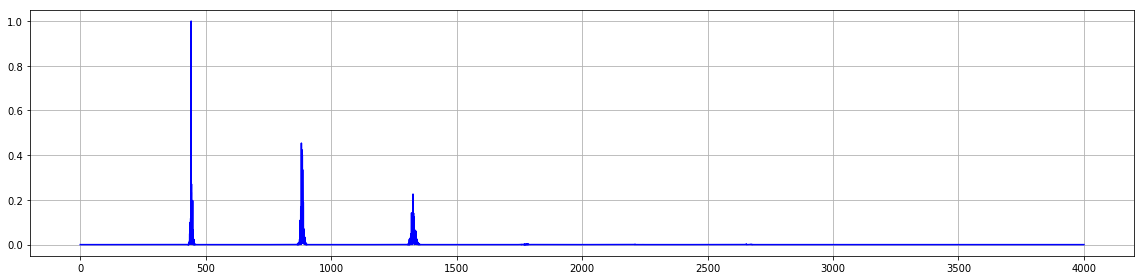

In [29]:
def FFT (channel,rate,npts):
    """ Discrete Fast Fourier Transform of array """
    fftdata = fftpack.fft(x=channel,n=npts)
    power = np.abs(fftdata)**2
    freqspace = fftpack.fftfreq(n=npts,d=1/rate)
    pts = np.where((freqspace>=0)&(freqspace<=4000))
    freqspace = freqspace[pts]
    power = power[pts]
    power = power/np.max(power)
    return freqspace,power
        
fspace,L_FFT = FFT(L,rate,(rate*10))

plt.figure(figsize=(16,4))
plt.plot(fspace,L_FFT,color='blue')
plt.grid()
plt.tight_layout()
plt.show()


Low: 0 High: 120 Features: 1201


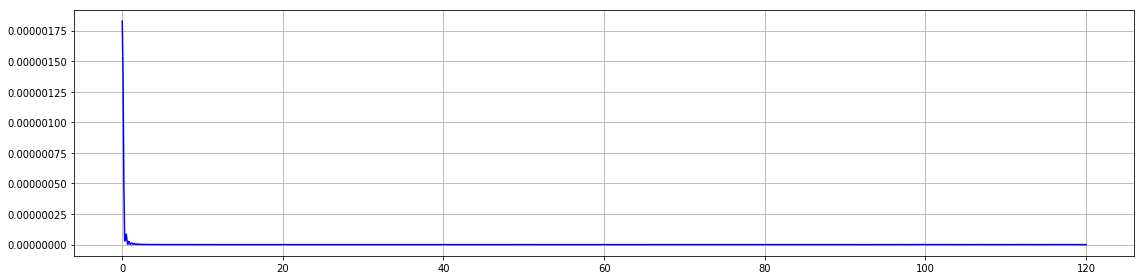

Low: 120 High: 500 Features: 3801


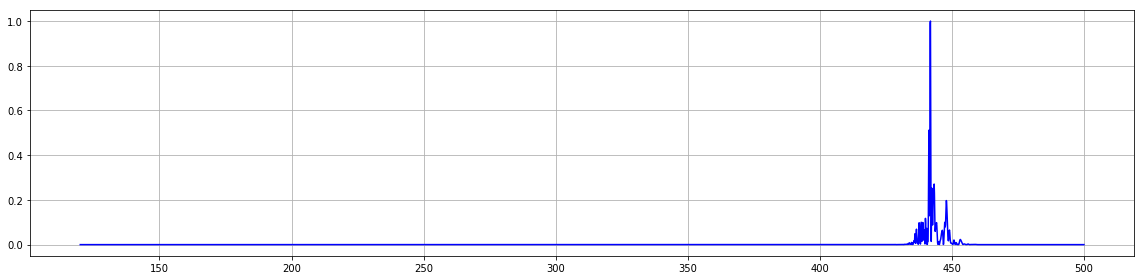

Low: 500 High: 1000 Features: 5001


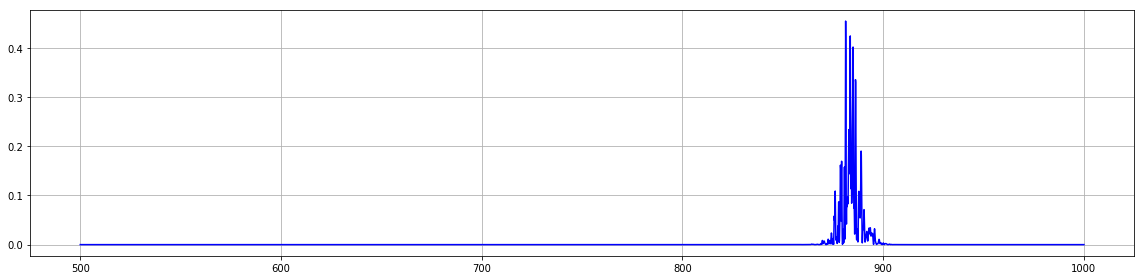

Low: 1000 High: 2500 Features: 15001


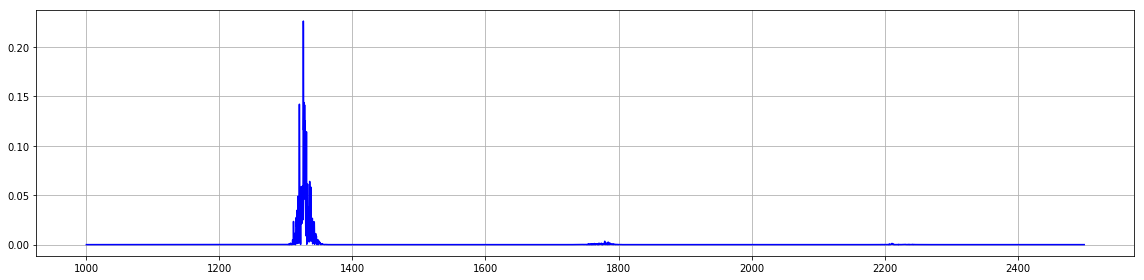

Low: 2500 High: 4000 Features: 15001


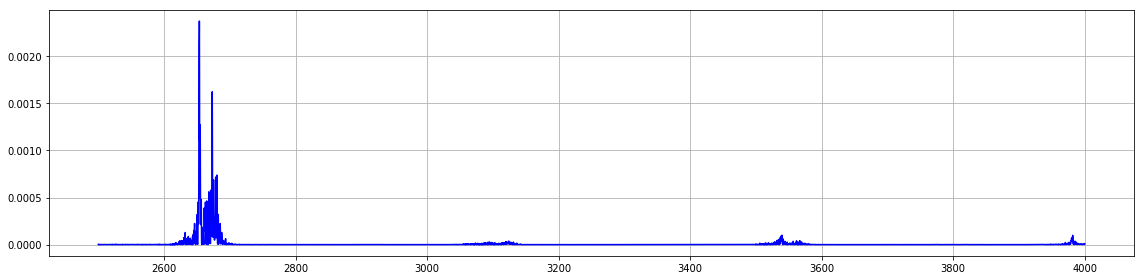

In [36]:
bounds = [(0,120),(120,500),(500,1000),(1000,2500),(2500,4000)]
#bounds = [(0,500),(500,1000),(1000,1500),(1500,2000),(2000,4000)]

for pair in bounds:
    pts = np.where((fspace>=pair[0])&(fspace<=pair[1]))
    freqspace = fspace[pts]
    FFT = L_FFT[pts]
    
    print("Low:",pair[0],"High:",pair[1],"Features:",len(pts[0]))
    plt.figure(figsize=(16,4))
    plt.plot(freqspace,FFT,color='blue')
    plt.grid()
    plt.tight_layout()
    plt.show()
    